### Training and Validation/Testing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() 
plt.rcParams['figure.figsize'] = (16, 12)
%matplotlib inline

In [2]:
cleaned_df=pd.read_csv('D:/Projects/github/Lecture5/data/clean/cleaned_solar_irradiation.csv')

In [3]:
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 'Daily_radiation']]
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [4]:
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,31,8.0375,10.7,95.25,1024.725,292.5,2.575,0.0,32.75,32.75
1,12,31,8.0375,10.7,95.25,1024.725,292.5,2.575,0.0,32.75,32.75
2,12,31,8.0375,10.7,95.25,1024.725,292.5,2.575,0.0,32.75,32.75
3,12,31,8.0375,10.7,95.25,1024.725,292.5,2.575,0.0,32.75,32.75
4,12,31,8.0375,10.7,95.25,1024.725,292.5,2.575,0.0,32.75,32.75


### Model Training and Testing

In [5]:
# Machine Learning Library (sklearn)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Save CSV file and distribute random sampling into Train/Test/Validation
train_data, validation_data, test_data = np.split(
    cleaned_df.sample(frac = 1), 
    [int(.7 * len(cleaned_df)), int(.85 * len(cleaned_df))]
)

# convert dataframes to .csv and save locally

train_data.to_csv('D:/Projects/github/Lecture5/data/clean/train.csv', header=True, index=False)
validation_data.to_csv('D:/Projects/github/Lecture5/data/clean/val.csv', header=True, index = False)
test_data.to_csv('D:/Projects/github/Lecture5/data/clean/test.csv', header = True, index = False)

In [7]:
# training data
train_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

## Linear Regression

In [8]:
# Setup the pipeline steps for linear regression
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [9]:
# RMSE to evaluate algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9451992012290789
Mean Squared Error: 29.80


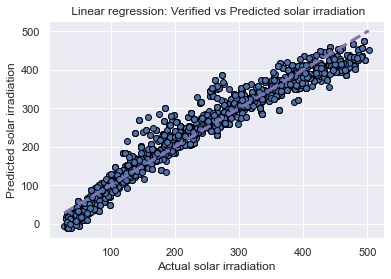

In [10]:
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

C:\Users\avi00\miniconda3\envs\full_stack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


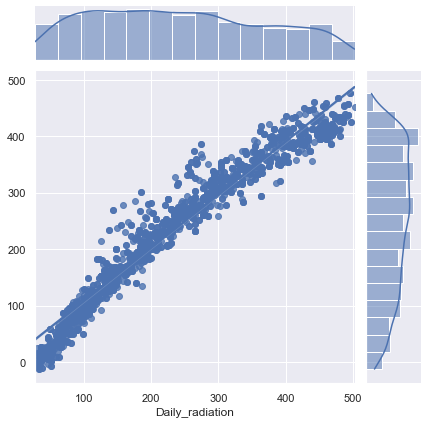

In [11]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

## Random Forest Regressor

In [12]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

In [13]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9999992010135907
Mean Squared Error: 0.11


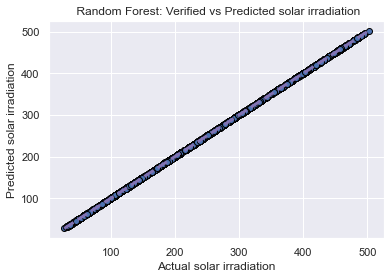

In [14]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

C:\Users\avi00\miniconda3\envs\full_stack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


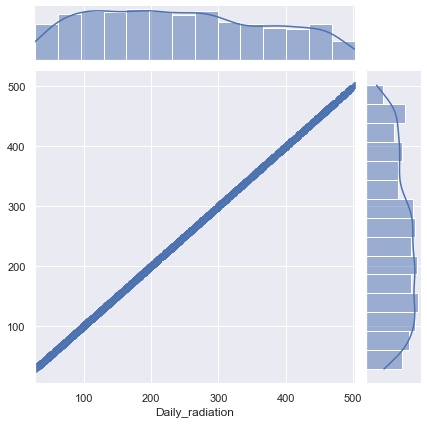

In [15]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

## Gradient Boosting Regressor

In [16]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [17]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9928155500065998
Mean Squared Error: 10.79


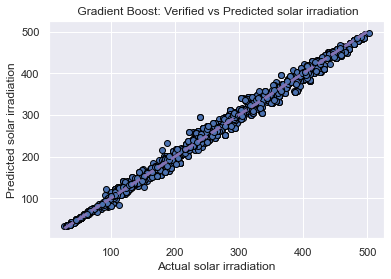

In [18]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

C:\Users\avi00\miniconda3\envs\full_stack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


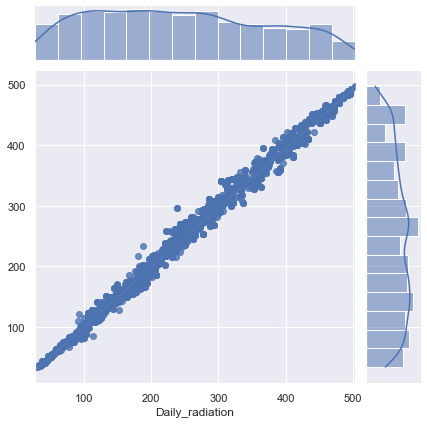

In [19]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

## Model Validation

In [21]:
# validation data
val_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/val.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [22]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [23]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_lr))
print('Linear Regression - Mean Squared Error: %.2f' % (mse_lr_val))

r2_score:  0.9441342083107535
Linear Regression - Mean Squared Error: 29.95


In [24]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_rfr))
print('Random Forest - Mean Squared Error: %.2f' % (mse_rf_val))

r2_score:  0.999998784245931
Random Forest - Mean Squared Error: 0.14


In [25]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_gbr))
print('Gradient Boost - Mean Squared Error: %.2f' % (mse_gbr_val))

r2_score:  0.9936006946591026
Gradient Boost - Mean Squared Error: 10.14
